## 1.Gaussian Filter Implementation 
### Overview
The project uses Python's standard scientific stack: 
- OpenCV for image processing
- NumPy for numerical array operations
- Matplotlib for visualization.


Core Concept & Mathematics
Gaussian smoothing is a weighted average operation where the importance of neighboring pixels decreases as they move further from the center. The behavior is governed by the 2D Gaussian function: 

$$G(x, y) = \frac{1}{2\pi\sigma^2} e^{-\frac{x^2+y^2}{2\sigma^2}}$$

The standard deviation (σ) acts as a "blur dial"; a higher σ results in a wider filter and more pronounced blurring

## 2. Prject Code
### Step 1: Import Required Libraries
We need three main libraries:

- cv2 (OpenCV): For image loading and built-in filtering functions
- numpy: For manual convolution implementation and array operations
- matplotlib: For displaying images side by side

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [6]:
# 1. Load a real image (using grayscale for technical clarity)
from pathlib import Path
# Try to load an image robustly from the images folder
img_path = Path('images') / 'noisy.jpg'
if not img_path.exists():
    candidates = list(Path('images').glob('*'))
    img_path = candidates[0] if candidates else None

if img_path is not None:
    img_in = cv2.imread(str(img_path), cv2.IMREAD_GRAYSCALE)
else:
    img_in = None

if img_in is None:
    # Provide a helpful message and fall back to a synthetic image
    print('Warning: could not read any image from images/. Using synthetic test image.')
    img_in = np.tile(np.linspace(0, 255, 256, dtype=np.uint8), (256, 1))

# 2. Add White Gaussian Noise to demonstrate denoising effectiveness [10, 11]
mean, std = 0, 50
# Generate Gaussian noise using numpy and add safely to avoid dtype/shape errors
gauss_noise = np.random.normal(mean, std, img_in.shape).astype(np.int16)
noisy_img = img_in.astype(np.int16) + gauss_noise
noisy_img = np.clip(noisy_img, 0, 255).astype(np.uint8)

### Apply Gaussian Smoothing with different kernel sizes and sigma values

In [9]:
# 3. Apply Gaussian Smoothing with different kernel sizes and sigma values [8, 12]
# Note: Kernel size should be ~6 * sigma and odd [13, 14]
blur_small = cv2.GaussianBlur(noisy_img, (5, 5), 1.0)
blur_large = cv2.GaussianBlur(noisy_img, (11, 0        1), 3.0)

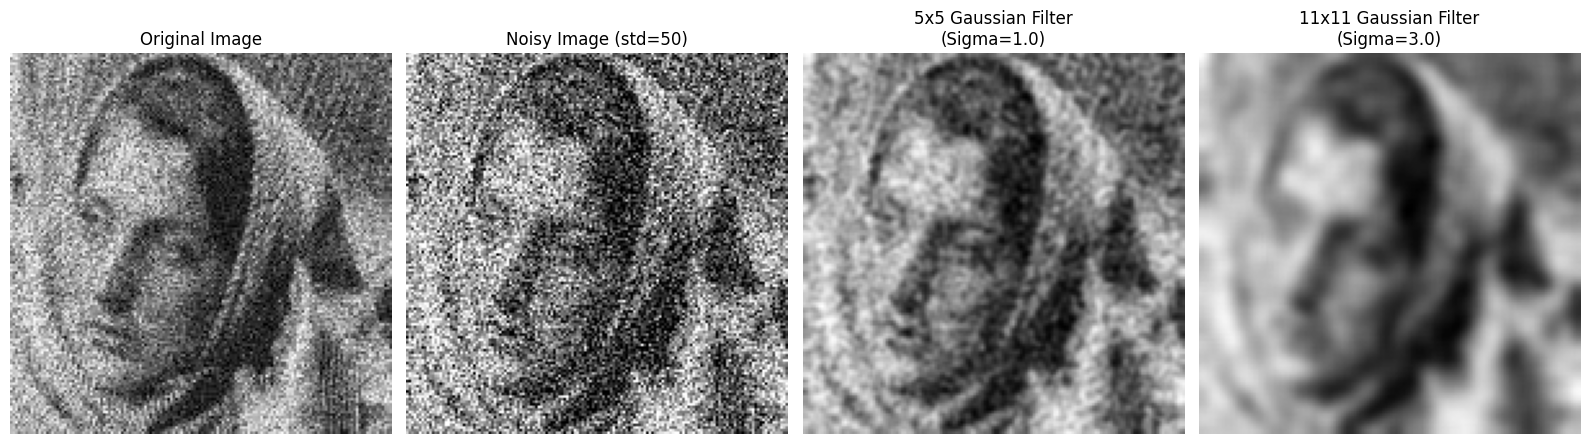

In [ ]:
# 4. Display results and comparisons [9, 15]
plt.figure(figsize=(16, 8))

plt.subplot(1, 4, 1)
plt.imshow(img_in, cmap='gray')
plt.title('Original Image'), plt.axis('off')

plt.subplot(1, 4, 2)
plt.show(noisy_img, cmap='gray')
plt.title('Noisy Image (std=50)'), plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(blur_small, cmap='gray')
plt.title('5x5 Gaussian Filter\n(Sigma=1.0)'), plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(blur_large, cmap='gray')
plt.title('11x11 Gaussian Filter\n(Sigma=3.0)'), plt.axis('off')

plt.tight_layout()
plt.show()

## 3. Results and Comparisons

### *Impact of Noise Reduction*
• *Original vs. Noisy*: The noisy image displays high-frequency "graininess" caused by random intensity jumps between pixels.

• *Smoothing Effect*: Passing the noisy image through Gaussian filters minimizes the impact of this noise. Because Gaussian filters are isotropic, the blurring is perfectly uniform in all directions, avoiding the "squarish" artifacts seen in basic box filters.

### *Comparison of Filter Scales*
• *Kernel Size* (5×5 vs. 11×11): As the kernel size increases, the extent of filtering becomes more aggressive.

• *Detail vs. Denoising:*
    ◦ The small filter (5×5) successfully reduces fine-grain noise while preserving the primary edges of the subject.
    ◦ The large filter (11×11) removes almost all visible noise but results in a significant loss of image detail, making the picture appear very "fuzzy".


### Key Observations
• No Ringing: Unlike "Ideal" filters, the Gaussian output shows no false oscillations or "ghost" lines around edges.
• Computational Speed: In larger implementations, Gaussian kernels are separable, allowing the computer to process rows and columns independently, which is much faster than standard 2D convolutio